# integrated project 3

Prepare a prototype of a machine learning model for Zyfra. 
The company develops efficiency solutions for heavy industry.

The model should predict the amount of gold recovered from gold ore.
You have the data on extraction and purification.

The model will help to optimize the production and eliminate unprofitable parameters.

## imports
importing libraries and functions:

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
#from sklearn.preprocessing import LabelEncoder
#from sklearn import svm
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
#from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import sidetable as stb
#import matplotlib.pyplot as plt
#from sklearn.metrics import f1_score
#from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# preparing the data

In [2]:
try:
    
    path='C:\\Users\\aviv\\Downloads\\gold_recovery_train.csv'
    train = pd.read_csv(path)
    print(train.head(), '*'*50)
    
    path='C:\\Users\\aviv\\Downloads\\gold_recovery_test.csv'
    test = pd.read_csv(path)
    print(test.head(), '*'*50)
    
    path='C:\\Users\\aviv\\Downloads\\gold_recovery_full.csv'
    full = pd.read_csv(path)
    print(full.head(), '*'*50)

    
except:
    path = '/datasets/gold_recovery_train.csv'
    train = pd.read_csv(path)
    print(train.head(), '*'*50)
    
    path = '/datasets/gold_recovery_test.csv'
    test = pd.read_csv(path)
    print(test.head(), '*'*50)
    
    path = '/datasets/gold_recovery_full.csv'
    full = pd.read_csv(path)
    print(full.head(), '*'*50)
    

    

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [3]:
data_list = [train, test, full]
for data in data_list:
    print(data.info())
    print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


## null values

let's check for null values, as they give errors in the MAE calculation

In [4]:
train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

tried 'ffill' method but it won't get rid of all the NaN values, so instead i decided to just drop them altogether.

In [5]:
train = train.loc[:,train.columns].dropna()
train.isnull().sum()

test = test.loc[:, test.columns].dropna()
test.isnull().sum()

full = full.loc[:,train.columns].dropna()

## Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [6]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
recovery = pd.Series((C*(F-T)) / (F*(C-T)) * 100 )
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 11017, dtype: float64

In [7]:
def mae(X,Y):
    sigma=0
    for a,b in zip(X,Y):
        #print("a:", a, "b:", b)
        sigma+=abs(a-b)
        
    return sigma/len(X)

In [8]:

mae(train['rougher.output.recovery'], recovery)
#train['rougher.output.recovery']
#recovery

9.460144184559453e-15

had to drop NaN values as they affected the MAE calculation. but the MAE is so small it looks as though the calculation was done precisely as i have. even the small MAE could've been zero, probably just a small computing error by python.

## Analyze the features not available in the test set. What are these parameters? What is their type?

In [9]:
not_in_test = set(train.columns) - set(test.columns)
list(not_in_test)

['final.output.recovery',
 'rougher.output.recovery',
 'rougher.output.tail_sol',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_sol',
 'rougher.output.tail_ag',
 'final.output.tail_au',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.tail_pb',
 'primary_cleaner.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.tail_ag',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_sol',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_ag',
 'secondary_cleaner.output.tail_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'final.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.

some parameters are not available because they were measured and/or calculated much later. That's why some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

## Perform data preprocessing.

we've already gotten rid of missing values.

### changing date columns to datetype

In [10]:

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

train.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

### values of concentrations close to zero which should be dropped (outliers)

In [11]:
metals = ['au','ag','pb']
columns = ['rougher.output.concentrate_','primary_cleaner.output.concentrate_','final.output.concentrate_']
for i,metal in enumerate(metals):
    for col in columns:
        train.drop(train[train[col+metal] < 2.3].index, inplace=True)
        

# Analyze the data

##  Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

/tmp/ipykernel_31/251366815.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3,1,i+1) # subplot(nrows, ncols, index, **kwards)


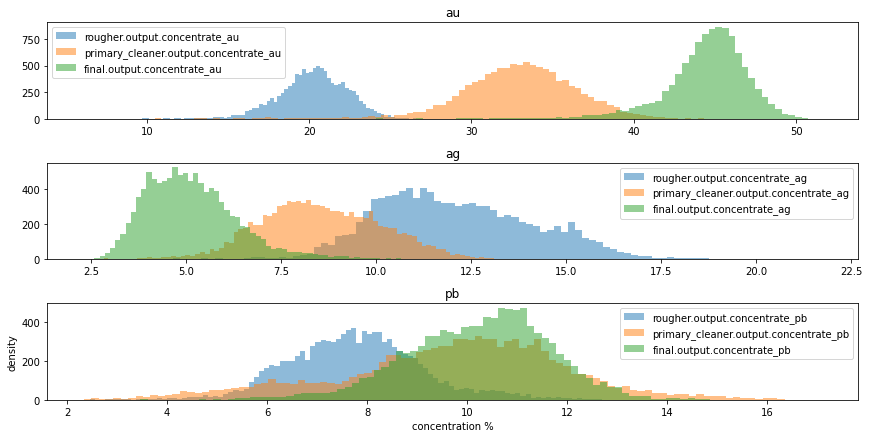

In [12]:
metals = ['au','ag','pb']
columns = ['rougher.output.concentrate_','primary_cleaner.output.concentrate_','final.output.concentrate_']

fig = plt.figure(figsize=(12,6))
for i,metal in enumerate(metals):
    for col in columns:
        plt.subplot(3,1,i+1) # subplot(nrows, ncols, index, **kwards)
        plt.hist(train[col+metal],bins=100,label=col+metal, alpha=.5)
    plt.title(metal)
    
    plt.legend()

plt.tight_layout()
plt.xlabel('concentration %')
plt.ylabel('density')
plt.show()

for the au plot looks like smallest concentration is in the rougher stage, increases at the primary cleaner and once more in the final output stage.

ag plot - concentrations lower during the primary cleaner stage, and increase again at the final stage. perhaps some of the material is seperated to the tails.

pb plot - seems the concentrations throughout different stages overlap a lot which i'm guessing means that most of the extractions of lead happens in the flotation stage.
reading a little about lead, i found out that it's been prevalent since ancient times **because** it was easy to extract.


<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, makes sense!

</div>

## Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

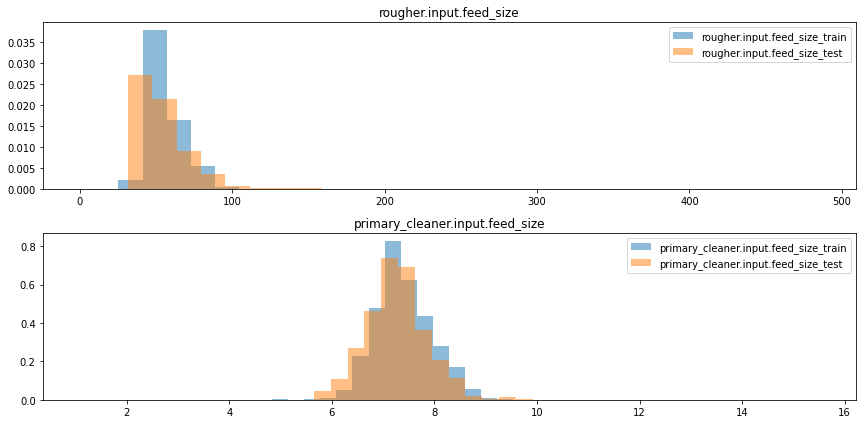

In [13]:
columns = ['rougher.input.feed_size','primary_cleaner.input.feed_size']

fig = plt.figure(figsize=(12,6))
for i,col in enumerate(columns):
    plt.subplot(2,1,i+1)
    plt.hist(train[col], bins=30, label=col+'_train', alpha=.5, density=1);
    plt.hist(test[col],bins=30, label = col+'_test',alpha=.5, density=1);
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

In [14]:
from scipy.stats import mannwhitneyu, kstest
for i,col in enumerate(columns):
    stat, p = kstest(train[col],test[col])
    print(col, " :", round(stat, 3), p)

rougher.input.feed_size  : 0.235 2.633839934077554e-173
primary_cleaner.input.feed_size  : 0.107 3.743890230438988e-36


so the distances aren't that big, (by the KS test) so we can say the distributions of the feed sizes are similar enough

## Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [15]:
sum1 = train['rougher.input.feed_au']+train['rougher.input.feed_ag']+train['rougher.input.feed_pb']
sum2 = train['rougher.output.concentrate_au']+train['rougher.output.concentrate_ag']+train['rougher.output.concentrate_pb']
sum3 = train['final.output.concentrate_au']+train['final.output.concentrate_ag']+train['final.output.concentrate_pb']



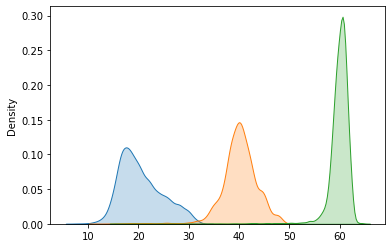

In [16]:
sns.kdeplot(sum1, shade='fill')
sns.kdeplot(sum2, shade='fill')
sns.kdeplot(sum3, shade='fill');

i've eliminated most of the values that give sums that are close to zero, as they could affect the model training and evaluation.
other than that, the blue represents rougher input, orange rougher output, green final output, and this makes sense as we expect the concentrations to grow as the stages of purification progress.

# Build the model

In [17]:
x=set(train.columns)
y=set(test.columns)
z=x.intersection(y)

target = ['rougher.output.recovery','final.output.recovery']
features = [col for col in z if col not in {'date','rougher.output.recovery', 'final.output.recovery'}  ]

In [18]:
sorted(features)

['primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

In [19]:
features_train0, features_test0 = train[features].values, test[features].values
target_train_r = train[target[0]].values
target_train_f = train[target[1]].values
target_train_r

target_train_both = train[target].values
target_train_both

array([[87.10776293, 70.54121591],
       [86.84326051, 69.26619763],
       [86.84230826, 68.11644507],
       ...,
       [88.89057853, 67.00218885],
       [89.858126  , 65.52324622],
       [89.51495973, 70.28145415]])

##  Write a function to calculate the final sMAPE value.

In [47]:
# def smape(y_true, y_pred):
#     sigma = 0
#     for w,u in zip(y_true, y_pred):
#         sigma+=abs(w-u)/np.mean([abs(w),abs(u)])
#         #print(f'w is {w} u is {u}')
#     return sigma/len(y_true)*100
# this is wrong somewhere

def smape(y_true, y_pred):
    return 200 * np.mean(np.abs(y_true - y_pred)/(np.abs(y_true) + np.abs(y_pred)))



## Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [49]:
lr = LinearRegression()

In [50]:
scores = []

# set the block size if there are only three of them
sample_size = int(len(features_train0)/5)

for i in range(0, len(features_train0), sample_size):
    valid_indexes = list(range(i, i+sample_size))
    train_indexes = list(range(0, i)) + list(range(i+sample_size, len(features_train0))) #write an array of indices for the training set
    
    
    features_train = features_train0[train_indexes]
    features_valid = features_train0[valid_indexes, :]
    target_train = target_train_both[train_indexes]
    target_valid = target_train_both[valid_indexes]
    model = lr
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    score = 0.25*smape(target_valid[0,:], predicted_valid[0,:]) + 0.75*smape(target_valid[1,:],predicted_valid[1,:]) # < evaluate model quality >
    
    scores.append(score)
    
final_score = np.mean(scores)
print('Average model quality score:', final_score, "(smaller is better)")



Average model quality score: 4.4364364081907475 (smaller is better)


let's see if we can beat 6 with random forest

In [51]:
for n_est in range(1,9):
    
    scores = []

# set the block size if there are only three of them
    sample_size = int(len(features_train0)/5)

    for i in range(0, len(features_train0), sample_size):
        valid_indexes = list(range(i, i+sample_size))
        train_indexes = list(range(0, i)) + list(range(i+sample_size, len(features_train0))) #write an array of indices for the training set
    
    
        features_train = features_train0[train_indexes]
        features_valid = features_train0[valid_indexes, :]
        target_train = target_train_both[train_indexes]
        target_valid = target_train_both[valid_indexes]
        model = RandomForestRegressor(n_estimators=n_est, random_state=12345)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        score = 0.25*smape(target_valid[0,:], predicted_valid[0,:]) + 0.75*smape(target_valid[1,:],predicted_valid[1,:])
    
        scores.append(score)
    
    final_score = np.mean(scores)
    print("n_est:",n_est,'Average model quality score:', final_score, "(smaller is better)")

n_est: 1 Average model quality score: 3.677621004950519 (smaller is better)
n_est: 2 Average model quality score: 3.8160853915408466 (smaller is better)
n_est: 3 Average model quality score: 3.352256409180794 (smaller is better)
n_est: 4 Average model quality score: 4.20969362593515 (smaller is better)
n_est: 5 Average model quality score: 4.44286446017249 (smaller is better)
n_est: 6 Average model quality score: 4.230828160319578 (smaller is better)
n_est: 7 Average model quality score: 4.003882073025439 (smaller is better)
n_est: 8 Average model quality score: 4.3173202368210415 (smaller is better)


n_est = 3 is best, let's check max_depth values

In [52]:
for depth in range(1,8):
    rfr = RandomForestRegressor(n_estimators=3, max_depth = depth, random_state=12345)
    
    scores = []

# set the block size if there are only three of them
    sample_size = int(len(features_train0)/5)

    for i in range(0, len(features_train0), sample_size):
        valid_indexes = list(range(i, i+sample_size))
        train_indexes = list(range(0, i)) + list(range(i+sample_size, len(features_train0))) #write an array of indices for the training set
    
    
        features_train = features_train0[train_indexes]
        features_valid = features_train0[valid_indexes,:]
        target_train = target_train_both[train_indexes]
        target_valid = target_train_both[valid_indexes]
        model = rfr
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        score = 0.25*smape(target_valid[0,:], predicted_valid[0,:]) + 0.75*smape(target_valid[1,:],predicted_valid[1,:])
    
        scores.append(score)
    
    final_score = np.mean(scores)
    print('depth', depth ,'Average model quality score:', final_score, "(smaller is better)")

depth 1 Average model quality score: 5.631587967756614 (smaller is better)
depth 2 Average model quality score: 4.011585068356821 (smaller is better)
depth 3 Average model quality score: 3.3756918265912232 (smaller is better)
depth 4 Average model quality score: 3.101847441217676 (smaller is better)
depth 5 Average model quality score: 3.391873283430436 (smaller is better)
depth 6 Average model quality score: 3.5910009182463627 (smaller is better)
depth 7 Average model quality score: 3.5741122215135563 (smaller is better)


best depth is 4

In [53]:
test1 = test.merge(full[['date']+target], on='date', how='inner')
print(sorted(test1.columns))

['date', 'final.output.recovery', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 'primary_cleaner.input.sulfate', 'primary_cleaner.input.xanthate', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air', 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.recovery', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher

In [58]:
rfr = RandomForestRegressor(max_depth = 4, n_estimators = 3, random_state=12345).fit(features_train0, target_train_both)
predicted_valid = rfr.predict(test1[features])
score = 0.25*smape(test1[target[0]], predicted_valid[:,0]) + 0.75*smape(test1[target[1]],predicted_valid[:,1])
print("score is", round(score,3), "%")





score is 8.722 %


let's compare with a constant model

In [59]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train0, target_train_both)

predicted_dummy = dummy_regr.predict(test1[features])
score = 0.25*smape(test1[target[0]], predicted_dummy[:,0]) + 0.75*smape(test1[target[1]],predicted_dummy[:,1])

print("score is", round(score,3), "%")

score is 8.739 %


this isn't very good. i'll try linear regressions again

In [61]:
model = lr
model.fit(features_train0, target_train_both)
predicted_valid = model.predict(test1[features])
score = 0.25*smape(test1[target[0]], predicted_valid[:,0]) + 0.75*smape(test1[target[1]],predicted_valid[:,1])
print("score is", round(score,3), "%")

score is 8.138 %


guess the linear regression is better, but not significantly.